# Logistic Regression w/Cross Validation

### Import required packages

In [12]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import matplotlib.pylab as plt

from dmba import classificationSummary, gainsChart, liftChart

#### The HR_Churn dataset was developed by IBM to model Human Resource considerations in business analytics. Our goal is to predict the likelihood of an employee quitting the firm. This is an important issue, notably because hiring and training costs are high, and even more so, losing a critical employee can be detrimental to the company.

### Load the data and perform initial inspection

In [13]:
hr_df = pd.read_csv('HR_Churn.csv')

hr_df.head(20)

,Gone,Age,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,8,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,2,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,3,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,2,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
5,No,32,Travel_Frequently,2,4,Male,3,1,Laboratory Technician,4,Single,3068,0,No,13,3,3,0,8,2,2,7,7,3,6
6,No,59,Travel_Rarely,3,3,Female,4,1,Laboratory Technician,1,Married,2670,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,No,30,Travel_Rarely,24,4,Male,3,1,Laboratory Technician,3,Divorced,2693,1,No,22,4,2,1,1,2,3,1,0,0,0
8,No,38,Travel_Frequently,23,4,Male,2,3,Manufacturing Director,3,Single,9526,0,No,21,4,2,0,10,2,3,9,7,1,8
9,No,36,Travel_Rarely,27,3,Male,3,2,Healthcare Representative,3,Married,5237,6,No,13,3,2,2,17,3,2,7,7,7,7


In [ ]:
hr_df.shape

In [ ]:
hr_df.dtypes

In [14]:
# Create a y response variable and an X collection of predictors

y = hr_df['Gone']

X = hr_df.drop(columns=['Gone'])

print(len(X.columns))

24


In [15]:
y = y.astype('category').cat.codes

In [4]:
# Dummy code the set of predictors in preparation of logistic regression

X_exp = pd.get_dummies(X, prefix_sep='_', drop_first=True)

print(len(X.columns))

33


In [5]:
# Convert the text of Gone to a binary numeric variable (0/1)
y = y.astype('category').cat.codes

# Check for a class imbalance
y.value_counts()

0    1233
1     237
dtype: int64

#### Print out a list of attributes by name and number as a dictionary for future use because some data preprocessing steps will remove the names from the predictors and replace them with a sequence number.

In [6]:
print(pd.DataFrame(X.columns))

                                   0
0                                Age
1                   DistanceFromHome
2            EnvironmentSatisfaction
3                     JobInvolvement
4                           JobLevel
5                    JobSatisfaction
6                      MonthlyIncome
7                 NumCompaniesWorked
8                  PercentSalaryHike
9                  PerformanceRating
10          RelationshipSatisfaction
11                  StockOptionLevel
12                 TotalWorkingYears
13             TrainingTimesLastYear
14                   WorkLifeBalance
15                    YearsAtCompany
16                YearsInCurrentRole
17           YearsSinceLastPromotion
18              YearsWithCurrManager
19  BusinessTravel_Travel_Frequently
20      BusinessTravel_Travel_Rarely
21                       Gender_Male
22           JobRole_Human Resources
23     JobRole_Laboratory Technician
24                   JobRole_Manager
25    JobRole_Manufacturing Director
2

### Cross Validated Explanatory Model using GridSearchCV

In [10]:
param_grid = {
    'penalty': ['l2'],
    'C' : [1e42],
    'solver': ['liblinear'],
    'class_weight': ['balanced'],
}

In [11]:
gridSearch = GridSearchCV(LogisticRegression(), param_grid, cv=10)

gridSearch.fit(X_exp, y)

print('Initial parameters: ', gridSearch.best_params_)

logit_reg = gridSearch.best_estimator_
print()
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns))

Initial parameters:  {'C': 1e+42, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

intercept  2.7533671494612193
                             coeff
Age                      -0.021775
BusinessTravel            2.971342
DistanceFromHome          0.033943
EnvironmentSatisfaction  -0.360623
Gender                   -0.544711
JobInvolvement           -0.487413
JobLevel                  0.199161
JobRole                   3.640551
JobSatisfaction          -0.333516
MaritalStatus             2.992394
MonthlyIncome            -0.000087
NumCompaniesWorked        0.157223
OverTime                  7.047877
PercentSalaryHike        -0.040007
PerformanceRating         0.130752
RelationshipSatisfaction -0.183313
StockOptionLevel         -0.312669
TotalWorkingYears        -0.052138
TrainingTimesLastYear    -0.143275
WorkLifeBalance          -0.218393
YearsAtCompany            0.103112
YearsInCurrentRole       -0.129012
YearsSinceLastPromotion   0.147710
YearsWithCurrManager     -0

#### Train/test split with stratification of the response variable

In [16]:
# Split the data into training and test sets (holdout approach)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, stratify=y, random_state=1)

In [18]:
import category_encoders as ce

encoder = ce.CatBoostEncoder()

train_X = encoder.fit_transform(train_X, train_y)
test_X = encoder.fit_transform(test_X, test_y)

In [44]:
train_X.shape

(735, 33)

In [45]:
train_y.value_counts()

0    617
1    118
dtype: int64

In [14]:
rslt_df = hr_df.loc[hr_df['Gone'] == "Yes"]
rslt_df.head(10)

,Gone,Age,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1,2,Female,3,2,Sales Executive,4,...,3,1,0,8,0,1,6,4,0,5
2,Yes,37,Travel_Rarely,2,4,Male,2,1,Laboratory Technician,3,...,3,2,0,7,3,3,0,0,0,0
14,Yes,28,Travel_Rarely,24,3,Male,2,1,Laboratory Technician,3,...,3,2,0,6,4,3,4,2,0,3
21,Yes,36,Travel_Rarely,9,3,Male,2,1,Sales Representative,1,...,4,2,0,10,4,3,5,3,0,3
24,Yes,34,Travel_Rarely,6,2,Male,3,1,Research Scientist,1,...,3,3,0,8,2,3,4,2,1,3
26,Yes,32,Travel_Frequently,16,2,Female,1,1,Research Scientist,1,...,4,2,0,10,5,3,10,2,6,7
33,Yes,39,Travel_Rarely,5,4,Male,3,2,Sales Representative,4,...,3,3,1,19,6,4,1,0,0,0
34,Yes,24,Travel_Rarely,1,2,Male,3,1,Research Scientist,4,...,3,1,1,6,2,2,2,0,2,0
36,Yes,50,Travel_Rarely,3,1,Male,2,1,Sales Representative,3,...,3,3,0,3,2,3,3,2,0,2
42,Yes,26,Travel_Rarely,25,1,Male,1,1,Laboratory Technician,3,...,3,3,0,1,2,2,1,0,0,1


#### Fix the class imbalance issue on the training data using a state-of-the-art algorithm.

In [61]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=1)

train_X, train_y = ada.fit_sample(train_X, train_y.ravel())

train_X = pd.DataFrame(train_X)
train_y = pd.Series(train_y)

In [47]:
# Check the synthetic insertions

train_y.value_counts()

0    617
1    580
dtype: int64

In [19]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

train_X = norm.fit_transform(train_X)
test_X = norm.transform(test_X)

### Predictive Model

In [20]:
logit_reg = LogisticRegressionCV(penalty="l2", Cs=100, solver='liblinear', class_weight = "balanced", cv=10, 
                                 max_iter=5000, scoring="accuracy", random_state=1)

model = logit_reg.fit(train_X, train_y)

In [21]:
# we are only interested in classification accuracy

classificationSummary(train_y, model.predict(train_X))

classificationSummary(test_y, model.predict(test_X))

Confusion Matrix (Accuracy 0.8694)

       Prediction
Actual   0   1
     0 610   7
     1  89  29
Confusion Matrix (Accuracy 0.8626)

       Prediction
Actual   0   1
     0 600  16
     1  85  34


In [59]:
classes = model.predict(test_X)

print(metrics.classification_report(test_y, classes))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       616
           1       0.75      0.45      0.57       119

    accuracy                           0.89       735
   macro avg       0.83      0.71      0.75       735
weighted avg       0.88      0.89      0.88       735



### Lift and Gain Charts

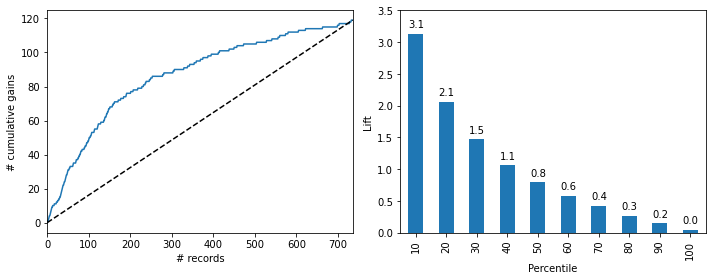

In [52]:
%matplotlib inline

logit_reg_pred = logit_reg.predict(test_X)
logit_reg_proba = logit_reg.predict_proba(test_X)
logit_result = pd.DataFrame({'actual': test_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

### ROC Chart

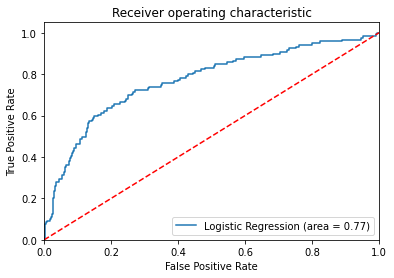

In [53]:
logit_reg_pred = logit_reg.predict(test_X)
logit_reg_proba = logit_reg.predict_proba(test_X)

preds = logit_reg_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()